In [7]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split

In the above code, we first import the necessary libraries: `numpy` for numerical computations, `matplotlib.pyplot` for data visualization, and `make_classification`, `load_iris`, and `load_breast_cancer` from `sklearn.datasets` to generate and load datasets.

Next, we generate a random dataset using the `make_classification` function from `sklearn.datasets`. We set the seed for reproducibility and create 100 samples with 2 informative features and no redundant features.

We also load two built-in datasets, namely the Iris dataset (`iris`) and the Breast Cancer dataset (`breast_cancer`), using the respective `load` functions from `sklearn.datasets`.

In [8]:
# Generating a random dataset
np.random.seed(42)  # Set the random seed for reproducibility
X_random, y_random = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                         n_clusters_per_class=1)
# make_classification generates a random classification dataset
# n_samples: Number of samples (instances) in the dataset
# n_features: Number of features (input variables) in the dataset
# n_informative: Number of informative features
# n_redundant: Number of redundant features
# n_clusters_per_class: Number of clusters per class (to control separation)


In [9]:
# Loading built-in datasets
iris = load_iris()  # Load the Iris dataset
breast_cancer = load_breast_cancer()  # Load the Breast Cancer dataset

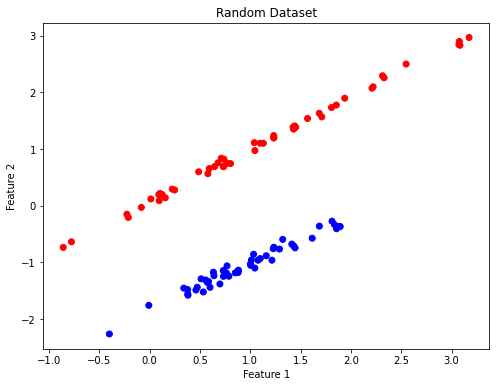

In [10]:
# Plotting the random dataset
plt.figure(figsize=(8, 6))  # Create a new figure with the specified size
plt.scatter(X_random[:, 0], X_random[:, 1], c=y_random, cmap='bwr')
# Scatter plot the random dataset
# X_random[:, 0]: First feature (column) of the random dataset
# X_random[:, 1]: Second feature (column) of the random dataset
# c=y_random: Color the data points based on the target labels
# cmap='bwr': Use the blue-white-red colormap for coloring
plt.title('Random Dataset')  # Set the title of the plot
plt.xlabel('Feature 1')  # Set the x-axis label
plt.ylabel('Feature 2')  # Set the y-axis label
plt.show()  # Display the plot


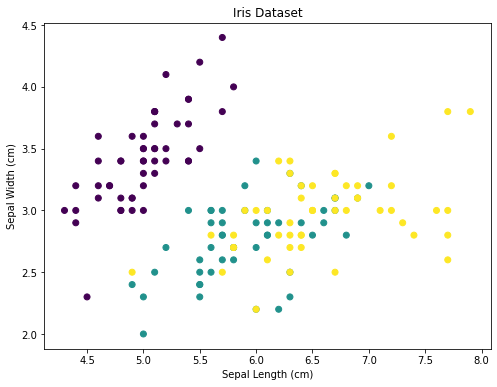

In [11]:
# Plotting the Iris dataset
plt.figure(figsize=(8, 6))  # Create a new figure with the specified size
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis')
# Scatter plot the Iris dataset
# iris.data[:, 0]: First feature (column) of the Iris dataset
# iris.data[:, 1]: Second feature (column) of the Iris dataset
# c=iris.target: Color the data points based on the target labels
# cmap='viridis': Use the viridis colormap for coloring
plt.title('Iris Dataset')  # Set the title of the plot
plt.xlabel('Sepal Length (cm)')  # Set the x-axis label
plt.ylabel('Sepal Width (cm)')  # Set the y-axis label
plt.show()  # Display the plot


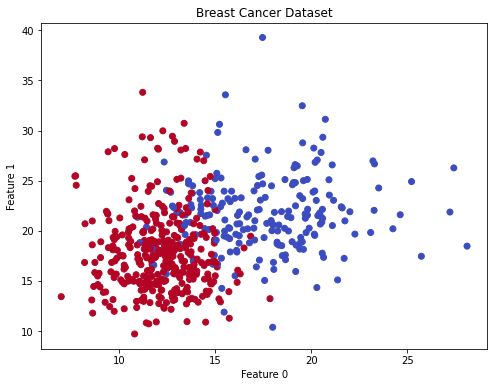

In [12]:
# Plotting the Breast Cancer dataset
plt.figure(figsize=(8, 6))  # Create a new figure with the specified size
plt.scatter(breast_cancer.data[:, 0], breast_cancer.data[:,
            1], c=breast_cancer.target, cmap='coolwarm')
# Scatter plot the Breast Cancer dataset
# breast_cancer.data[:, 0]: First feature (column) of the Breast Cancer dataset
# breast_cancer.data[:, 1]: Second feature (column) of the Breast Cancer dataset
# c=breast_cancer.target: Color the data points based on the target labels
# cmap='coolwarm': Use the coolwarm colormap for coloring
plt.title('Breast Cancer Dataset')  # Set the title of the plot
plt.xlabel('Feature 0')  # Set the x-axis label
plt.ylabel('Feature 1')  # Set the y-axis label
plt.show()  # Display the plot


In the above code, we visualize the imported datasets one by one using scatter plots. For each dataset, we create a separate figure and scatter plot using `plt.scatter`. We pass the features as the x and y coordinates, and the corresponding targets or labels for color mapping. The cmap parameter specifies the colormap to be used.

After plotting each dataset, we set the title, x-label, and y-label using `plt.title`, `plt.xlabel`, and `plt.ylabel`, respectively. Finally, we display the plot using `plt.show()`.

Now lets move on to the next section where we will learn and implement the learning algorithms.

Logistic regression is a statistical algorithm used for classification tasks, specifically to predict the probability of a binary outcome variable. It is commonly employed when the dependent variable has two categories, represented as 1 (indicating success) or 0 (indicating failure). In logistic regression, the goal is to estimate the probability P(Y=1) as a function of one or more independent variables, also known as features or predictors.

Multivariate logistic regression expands on this concept by incorporating multiple independent variables. By utilizing these variables, the logistic regression model establishes decision boundaries that can accommodate more than two classes. The model aims to find the relationship between the predictor variables and the categorical outcome, providing insights into how each independent variable contributes to the likelihood of the different outcomes.

Imagine you are trying to decide if it will rain or not based on the temperature outside. You notice that on hotter days, it tends to rain more often, and on colder days, it rarely rains. Logistic Regression helps us figure out the probability of an event happening, like rain, based on different factors.

Let's say we plot the temperature on a graph, where the x-axis represents temperature and the y-axis represents the probability of rain. We observe that as the temperature increases, the probability of rain also increases. We want to find a line that best fits the data points to help us predict the probability of rain at any given temperature.

Logistic Regression does this by drawing a straight line that tries to separate the data points into two groups: one group where rain is likely (let's call it "yes"), and another group where rain is unlikely (let's call it "no"). The line acts like a boundary that separates these two groups.

To draw this line, Logistic Regression uses a mathematical function called the sigmoid function. The sigmoid function takes any value and maps it to a value between 0 and 1. In our case, it gives us the probability of rain. If the probability is close to 0, it means rain is unlikely, and if it's close to 1, it means rain is very likely.

Logistic Regression learns the best line that separates the data points by adjusting its parameters during training. It finds the line that maximizes the likelihood of the observed data. Once the line is learned, we can use it to predict the probability of rain for new temperatures that were not part of the training data.

Logistic Regression is widely used because it is simple yet effective. It can handle both numerical and categorical input variables and is useful for classification tasks when we want to predict between two or more classes. It also allows us to interpret the relationship between the input variables and the predicted probabilities.

In summary, Logistic Regression helps us predict the probability of an event happening (like rain) based on different factors (like temperature). It draws a line that separates the data points into two groups and uses a sigmoid function to calculate the probabilities. By adjusting its parameters, it learns the best line that fits the data and allows us to make predictions.

In [31]:
def plot_decision_boundary(X, y, model):
    # Define the meshgrid range
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions on the meshgrid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points with different colors
    plt.figure(figsize=(30, 15))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Blues)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


Accuracy on the testing set: 1.000


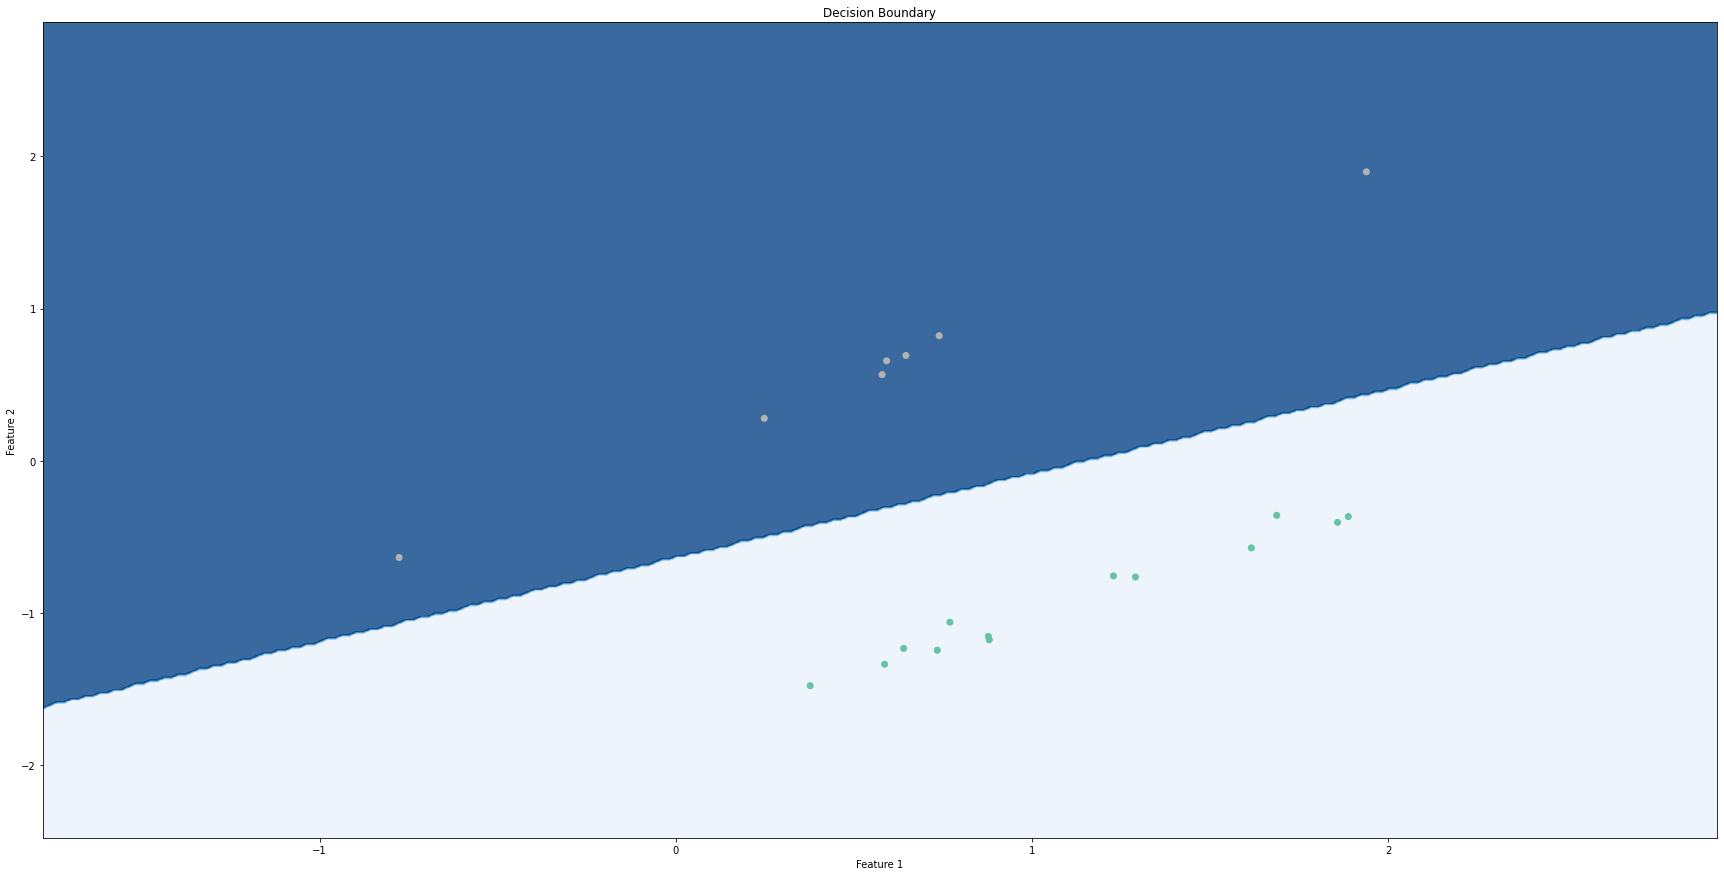

In [32]:
from sklearn.linear_model import LogisticRegression

# Splitting the random dataset into training and testing sets
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(
    X_random, y_random, test_size=0.2, random_state=42)

# Creating a Logistic Regression classifier
log_reg_random = LogisticRegression()  # Create a Logistic Regression classifier

# Training the Logistic Regression classifier
log_reg_random.fit(X_train_random, y_train_random)

# Evaluating the Logistic Regression classifier on the testing set
print('Accuracy on the testing set: {:.3f}'.format(
    log_reg_random.score(X_test_random, y_test_random)))

# Plotting the decision boundary
plot_decision_boundary(X_test_random, y_test_random, log_reg_random)


For the next dataset - Iris data - we look at another algo  -  Random Forest

Random Forest is a popular machine learning algorithm that belongs to the ensemble learning family. It is commonly used for both classification and regression tasks. The algorithm combines multiple decision trees to create a powerful predictive model.

The Random Forest algorithm works by creating a collection of decision trees, known as a forest. Each decision tree is trained on a random subset of the training data, as well as a random subset of the features. This randomness helps to introduce diversity among the trees and reduces overfitting, making the model more robust and accurate.

During training, each decision tree in the Random Forest independently makes predictions based on the features it was trained on. For classification tasks, the final prediction is determined through a voting process, where each tree's prediction is counted as a "vote." The class with the most votes becomes the predicted class label. For regression tasks, the final prediction is usually the average of the predictions from all the trees in the forest.

The strength of Random Forest lies in its ability to handle high-dimensional data, handle missing values, and provide an estimate of feature importance. It can effectively handle both categorical and numerical features without requiring extensive data preprocessing. The ensemble of decision trees helps to capture complex relationships and interactions between variables, making Random Forest a powerful and versatile algorithm.

Random Forest has become a popular choice in machine learning due to its robustness, scalability, and ability to handle a wide range of problem domains. It is widely used in various applications such as image classification, bioinformatics, fraud detection, and more. Additionally, Random Forest provides a measure of uncertainty in predictions, making it useful in assessing the model's reliability.

Random Forest is like a team of decision-makers working together to solve a problem. Imagine you want to decide what game to play. Instead of asking just one friend, you gather a group of friends who are good at different games. Each friend suggests a game based on their expertise. You then count the votes and choose the game with the most votes.

Similarly, in Random Forest, we have a group of decision trees, and each tree is like a friend with their own expertise. Decision trees are like flowcharts that ask questions about the data to make a prediction. Each tree in the Random Forest is built using a random subset of the data and a random subset of features.

When we want to make a prediction with Random Forest, we ask each decision tree in the forest for their prediction. Each tree gives its own answer, and then we count the votes to determine the final prediction. This voting process helps to reduce errors and make more accurate predictions.

Random Forest has several advantages. First, it is very good at handling complex tasks and large datasets. Second, it can handle both numerical and categorical features without requiring much data preprocessing. Third, it can provide estimates of feature importance, telling us which features are most influential in making predictions.

One key concept in Random Forest is the idea of "ensemble learning." Just like how a group of friends can make better decisions together than individually, Random Forest combines the knowledge and predictions of multiple decision trees to make more accurate predictions.

In summary, Random Forest is a powerful machine learning algorithm that uses a group of decision trees to make predictions. By leveraging the wisdom of the crowd, it improves accuracy and handles complex tasks effectively.

Accuracy on the testing set: 1.000


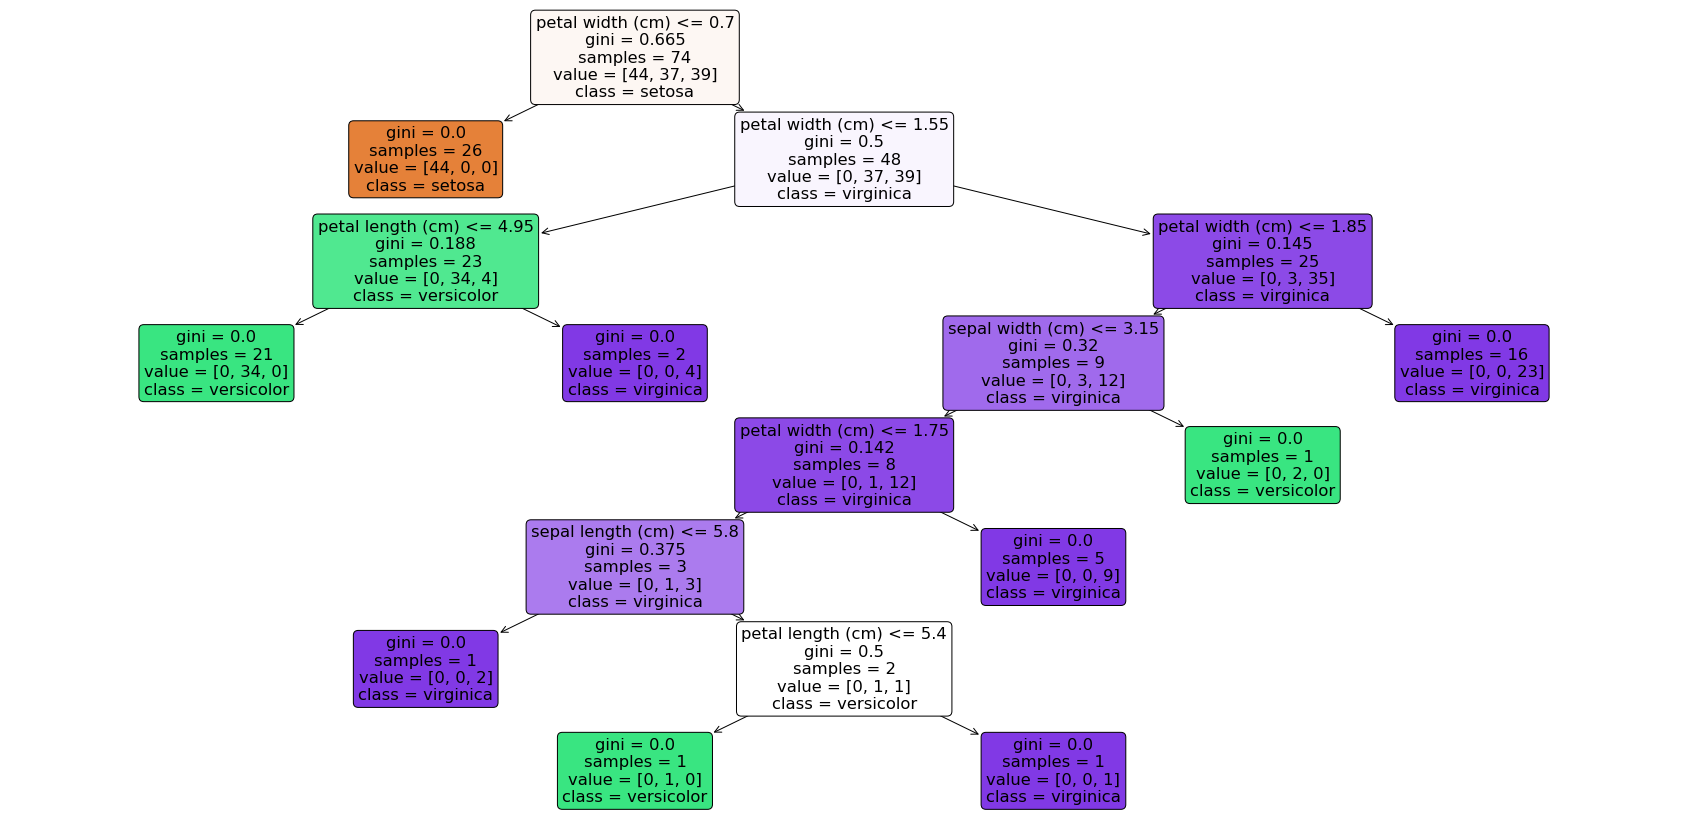

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Splitting the Iris dataset into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

# Creating a Random Forest classifier
rf_iris = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest classifier
rf_iris.fit(X_train_iris, y_train_iris)

# Evaluating the Random Forest classifier on the testing set
print('Accuracy on the testing set: {:.3f}'.format(
    rf_iris.score(X_test_iris, y_test_iris)))

tree = rf_iris.estimators_[0]  # Get the first decision tree in the Random Forest

# Plotting the first decision tree
plt.figure(figsize=(30, 15))
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names,
            filled=True, rounded=True)
plt.show()


Next Dataset - Breast Cancer on 